In [4]:
# Importación de las bibliotecas
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Para esta actividad se van a realizar dos ejercicios, el primero enfocado en crear la red neuronal simple y un segundo probando los resultados pero convirtiéndola en una Red Convolucional. 

### Carga del dataset, Actividad con TensorFlow

In [ ]:
#Carga de datasets de entrenamiento y testeo
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

for j,i in zip(["x_train", "y_train", "x_test", "y_test"],[x_train, y_train, x_test, y_test]):
    print(f"El shape de {j} es {i.shape}")

El shape de x_train es (50000, 32, 32, 3)
El shape de y_train es (50000, 1)
El shape de x_test es (10000, 32, 32, 3)
El shape de y_test es (10000, 1)


In [ ]:
# Valorando los valores del dataset
print(f"El mínimo es {np.min(x_train)}")

print(f"El máximo es {np.max(x_train)}")

El mínimo es 0
El máximo es 255


In [ ]:
# Normalizando los valores del dataset
x_train = x_train/255
x_test = x_test/255

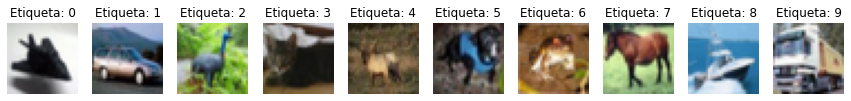

In [ ]:
# Comprobando cada una de las clases del dataset para ver que categorias contiene
#Grafico una imagen de cada categoría
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))

for ax, label in zip(axes,range(0,10)):
    ax.set_axis_off()
    ax.imshow(x_train[np.where(y_train==label)[0][0]])
    ax.set_title('Etiqueta: %i' % label)

#### **Creación del Modelo**

Se crea una red neuronal secuencial, tal como se solicita: 
* Una capa para pasar las imágenes de 2D a 1D.
* Dos capas lineales con 128 y 64 nodos, seguidas de una función de activación ReLU.
* Una capa lineal de salida que obtenga la probabilidad de cada clase.

In [ ]:
# Creando una instancia tipo models
model_tf = models.Sequential()

# Capa para pasar de 2d a 1d
model_tf.add(layers.Flatten(input_shape=(32, 32, 3))) 

# Primera capa lineal con 128 nodos y con activacion tipo ReLU (Rectified Linear Unit) 
model_tf.add(layers.Dense(128, activation="relu")) 

# Segunda capa lineral con 64 nodos y con activacion tipo Relu
model_tf.add(layers.Dense(64, activation="relu"))

# Capa de salida que serán los 10 tipos de etiquetas y la funcion Softmax
model_tf.add(layers.Dense(10, activation="softmax")) 

# Haciendo un summary del modelo
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


Se observa que la arquitectura de la red coincide con lo solicitado por el ejercicio. La capa que dice "Flatten" es la capa de entrada, donde se pasó de 2d a 1d, quedando 3072 debido a que el shape era de 32x32x3. La capa dense, y dense_1 son las capas lineales con 128 y 64 nodos respectivamente. La capa dense_2 es la capa de salida con un nodo por cada clase que se quiere predecir. En todos los casos se usa Rectified Linear Unit (ReLU) como función de activación.

A continuación se procede a entrenar la red:
* Optimizador: Stochastic Gradient Descent (SGD). Si bien la actividad no lo pide, le cambio la learning rate.
* Función de pérdida (loss): cross entropy, teniendo en cuenta que nuestra salida es categórica.
* Tamaño de lote (batch size): 16 imágenes o Entrenar durante 100 iteraciones (epochs) o Proporción entre entrenamiento y validación: 80% - 20%, para este caso se opta por entrenar durante 100 iteraciones.

In [ ]:
# Compilacion del modelo
model_tf.compile(optimizer = 'SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["mse","acc"])

In [ ]:
# Fiteando el modelo
history = model_tf.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 5s 3ms/step - loss: 1.9103 - mse: 27.6184 - acc: 0.3133 - val_loss: 1.8051 - val_mse: 27.6223 - val_acc: 0.3571
Epoch 2/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7313 - mse: 27.6235 - acc: 0.3862 - val_loss: 1.6886 - val_mse: 27.6269 - val_acc: 0.3968
Epoch 3/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6469 - mse: 27.6264 - acc: 0.4169 - val_loss: 1.6873 - val_mse: 27.6296 - val_acc: 0.3893
Epoch 4/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5897 - mse: 27.6286 - acc: 0.4382 - val_loss: 1.5918 - val_mse: 27.6283 - val_acc: 0.4357
Epoch 5/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5473 - mse: 27.6301 - acc: 0.4541 - val_loss: 1.5457 - val_mse: 27.6301 - val_acc: 0.4552
Epoch 6/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5107 - mse: 27.6314 - acc: 0.4657 - val_loss: 1.5194 - val_mse: 27.6323 - val_acc: 0.457

### Evaluación del modelo: 

Una vez ejecutadas las iteraciones, se procede a evaluar el modelo, con la curva de loss en función de las iteraciones realizadas, tal como solicita la actividad.

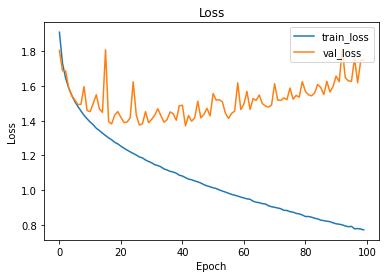

In [ ]:
# Ploteando la evolución de la función de pérdida para train y validation según las iteraciones
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Loss")
plt.show()

Se puede observar que en general con cada iteración la funciónde de pérdida tiende a disminuir (a nivel de train). Sin embargo se puede observar que la función de loss para la validación a partir de unas 5 etapas de entrenamiento se mantiene constante y empieza a crear réplicas y se mantiene constante entre 1.4 y 1.8.

Observamos que las **funciones de pérdida (loss)** de los datasets de entrenamiento y prueba divergen casi desde las primeras iteraciones, indicando que **se está produciendo overfitting y el modelo no generaliza bien**.

In [ ]:
#Calculo iteración donde se produce el mínimo de función de pérdida
print(f"La función de loss tiene un mínimo en la iteración {np.argmin(history.history['loss'])}")

La función de loss tiene un mínimo en la iteración 99


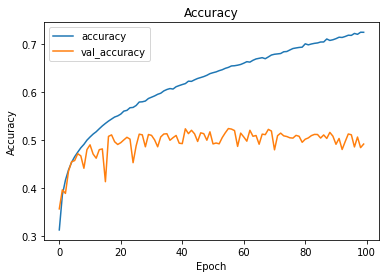

In [ ]:
# Ploteando la evolución de la accuracy según las iteraciones

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

En este caso se observa que el accuracy ha oscilado en las diferentes iteraciones entre 40% y poco más de 50%, esto por sí sólo no es un buen accuracy ya que no genera una buena predicción de las etiquetas.

In [ ]:
#Me fijo accuracy en train
print(f"La accuracy en train al finalizar las 100 iteraciones es de {round(history.history['acc'][-1]*100,2)}%.")
#Calculo iteración donde se produce máximo de accuracy en train
print(f"La accuracy en train llega a un máximo en la iteración {np.argmax(history.history['acc'])}, con un valor de {round(np.max(history.history['acc'])*100,2)}%.")

#Me fijo accuracy en validación
print(f"La accuracy en validación al finalizar las 100 iteraciones es de {round(history.history['val_acc'][-1]*100,2)}%.")
#Calculo iteración donde se produce máximo de accuracy en validación
print(f"La accuracy en validación llega a un máximo en la iteración {np.argmax(history.history['val_acc'])}, con un valor de {round(np.max(history.history['val_acc'])*100,2)}%.")

La accuracy en train al finalizar las 100 iteraciones es de 72.49%.
La accuracy en train llega a un máximo en la iteración 98, con un valor de 72.5%.
La accuracy en validación al finalizar las 100 iteraciones es de 49.21%.
La accuracy en validación llega a un máximo en la iteración 55, con un valor de 52.44%.


In [ ]:
#Realizo predicción en test
y_pred = model_tf.predict(x_test)

#Analizo loss, mse y accuracy en test
test_loss, test_metric_mse, test_metric_acc = model_tf.evaluate(x_test, y_test)

#Me fijo accuracy en test
print(f"\n La accuracy en test es de {round(test_metric_acc,4)*100}%.")

313/313 [==============================] - 1s 2ms/step - loss: 1.7530 - mse: 27.6596 - acc: 0.4921

 La accuracy en test es de 49.21%.


####**Análisis:**

Se puede observar a nivel general que el accuracy para el modelo a nivel de testing ha sido de un 49.21% y se detectó que hay cierto overfitting en el modelo. Por otro lado, se observa que el accuracy no ha sido bueno ya que se obtiene un general para el testing de un 49.21% mientras que para el entrenamiento fue de un 72.49%, vamos a proceder a validar esto con PyTorch.

### Carga del dataset, Actividad con PyTorch

In [6]:
# Importando bibliotecas
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [7]:
# Configurando PyTorch para que utilice la GPU de Colab
#Configuro Pytorch para usar la GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [8]:
# Cargando los datasets necesarios
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])




# Carga de dataset de train
# Se obtiene el dataset que debo dividir entre train y validación con el parámetro train=True
train_valid_set = datasets.CIFAR10('./data/', download=True, train=True, transform=transform)

# Validando la longitud del dataset
num_train = len(train_valid_set)
indices = list(range(num_train))

# Fijo semilla aleatoria

np.random.seed(42) 
np.random.shuffle(indices)
split = int(np.floor(0.2 * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# Se definen samplers para obtener batches de train y validation
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

Files already downloaded and verified


In [9]:
# Validando el tamano del dataset
len(valid_idx)

10000

In [11]:
# Cargando los datasets con el dataloader
# Para aleatorizar el train_ds y el val_ds se usa shuffle=True, en el Batch size se usa 16 tal como lo pide la actividad.
trainloader = torch.utils.data.DataLoader(train_valid_set, sampler=train_sampler)
validloader = torch.utils.data.DataLoader(train_valid_set, sampler=valid_sampler)

# Se obtiene el testset con el parámetro train=False
testset = datasets.CIFAR10('./data/', download=True, train=False, transform=transform)

testloader = torch.utils.data.DataLoader(testset, shuffle=False)

Files already downloaded and verified


A continuación se van a revisar las distintas etiquetas presentes en el dataset.

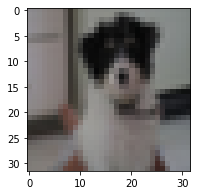

In [12]:
#Veo un ejemplo de las imagenes cargadas
import torchvision

#defino función para que muestre cada imagen del batch aleatorio
def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.figure(figsize = (20,3))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


#Obtengo imagenes aleatorias
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Veo las imagenes
imshow(torchvision.utils.make_grid(images))

Las imagenes siguen siendo del mismo estilo que las vistas con Tensorflow: animales y vehículos.

#### **Creación del Modelo**

Se crea una red neuronal secuencial, tal como se solicita: 
* Una capa para pasar las imágenes de 2D a 1D.
* Dos capas lineales con 128 y 64 nodos, seguidas de una función de activación ReLU.
* Una capa lineal de salida que obtenga la probabilidad de cada clase.

*Importante:* A diferencia de lo que sucedía con Tensorflow, con Pytorch se debe señalar los nodos de entrada.

In [13]:
# Se define el modelo en forma secuencial
model_pt = nn.Sequential(
                      # Primer capa que pasa de 2d a 1d
                      nn.Flatten(),
                      # Capa lineal con 128 nodos. De entrada recibe 3072 nodos de la capa inicial(32*32*3)
                      nn.Linear(32*32*3, 128),
                      # Función de activación ReLu al output de la capa anterior
                      nn.ReLU(),
                      # Capa lineal con 64 nodos. De entrada recibe 128 nodos de la capa lineal anterior 
                      nn.Linear(128, 64),
                      # Función de activación ReLu al output de la capa anterior
                      nn.ReLU(),
                      # Capa lineal final con 10 nodos, uno por cada clase. De entrada recibe 64 nodos de la capa lineal anterior    
                      nn.Linear(64, 10),

                      nn.LogSoftmax(dim=1)
                      )

# Ingestando modelo a device para usar la GPU
model_pt.to(device)

# Validando la arquitectura del modelo
print(model_pt)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
  (6): LogSoftmax(dim=1)
)


Se observa que la arquitectura de la red quedó con las capas solicitadas por la actividad. La capa que dice "Flatten" es la capa de entrada, donde se pasó de 2d a 1d. De dicha capa quedan 3072 features, que son tomados como entrada en la siguiente capa (fc1), la cual a su vez está formada por 128 nodos. La siguiente capa lineal toma esos 128 nodos de entrada, y presenta unos 64 de salida, tal como se exige en el ejercicio. La última capa lineal se nutre de esos 64 nodos, y tiene 10 features de salida que son las clases que se pretende predecir. Por último, se aclara que se usa Rectified Linear Unit (ReLU) como función de activación.

A continuación se procede a entrenar el modelo, con el optimizador y la función de pérdida solicitadas: 

* Optimizador: Stochastic Gradient Descent.
* Función de pérdida (loss): cross entropy, teniendo en cuenta que nuestra salida es categórica. Para esto debo usar CrossEntropyLoss en Pytorch.
* Tamaño de lote (batch size): se opta por entrenar durante 100 iteraciones tal y como se hizo con TensorFlow. 

In [14]:
# Fijo el optimizador de SGD
optimizer = optim.SGD(model_pt.parameters(), lr = 0.001)

# Fijo la función de pérdida
criterion =  nn.NLLLoss()

In [15]:
# Fijo 100 iteraciones como se solicita
epochs = 100

# Creo listas para guardar las pérdidas de cada iteración
train_losses=[]
valid_losses=[]


for e in range(epochs):
  train_loss=0.0
  valid_loss=0.0

  model_pt.train()
  for x_train, y_train in trainloader: 
      # inicializa los gradientes de los parámetros
      optimizer.zero_grad() 
      # calcula hacia adelante
      logits = model_pt(x_train.to(device)) # ejecuta el método forward
      # calcula la pérdida
      loss = criterion(logits, y_train.to(device)) 
      # calcula los gradientes a partir de la pérdida
      loss.backward() 
      # actualiza los pesos del modelo aplicando los gradientes a los parámetros 
      optimizer.step()
      #calcula la pérdida en train
      train_loss+=loss.item()*x_train.size(0)
  model_pt.eval()
  for x_valid, y_valid in validloader: 
      # calcula hacia adelante
      logits = model_pt(x_valid.to(device))
      # calcula la pérdida
      loss = criterion(logits, y_valid.to(device))
      #calcula la pérdida en validation
      valid_loss+=loss.item()*x_valid.size(0) 
  
  # Calculo las perdidas promedio en train y validation y las agrego a las listas creadas
  train_loss=train_loss/len(trainloader.dataset) 
  train_losses.append(train_loss)
  valid_loss=valid_loss/len(validloader.dataset) 
  valid_losses.append(valid_loss)
  print(f'Epoch:{e} Train Loss:{train_loss} valid Loss:{valid_loss}')

Epoch:0 Train Loss:1.4143712057397515 valid Loss:0.3219140386132896
Epoch:1 Train Loss:1.220366094351234 valid Loss:0.302760415938329
Epoch:2 Train Loss:1.1375799029853084 valid Loss:0.2896619918490853
Epoch:3 Train Loss:1.0770888420660298 valid Loss:0.28357161072128684
Epoch:4 Train Loss:1.0285673035738503 valid Loss:0.2828920914364213
Epoch:5 Train Loss:0.985929100046377 valid Loss:0.2811065387689072
Epoch:6 Train Loss:0.9506309335876538 valid Loss:0.2796401805290251
Epoch:7 Train Loss:0.9163060235572612 valid Loss:0.284771056527506
Epoch:8 Train Loss:0.8821023874835389 valid Loss:0.2826508060499515
Epoch:9 Train Loss:0.8528648831216132 valid Loss:0.2814165144601247
Epoch:10 Train Loss:0.8250435132818733 valid Loss:0.2903172603334517
Epoch:11 Train Loss:0.7987221284005567 valid Loss:0.28744852307839375
Epoch:12 Train Loss:0.7710118169421177 valid Loss:0.286891081798516
Epoch:13 Train Loss:0.7482989937165936 valid Loss:0.29898642998983826
Epoch:14 Train Loss:0.7232103915824615 valid L

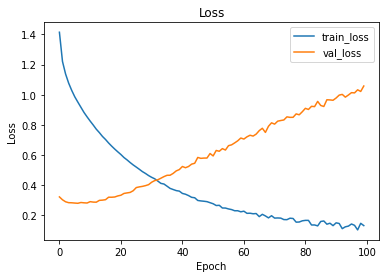

In [16]:
# Ploteando la evolución de la función de pérdida para train y validation según las iteraciones
plt.plot(train_losses, label='train_loss')
plt.plot(valid_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Loss")
plt.show()

Se puede observar que en general con cada iteración la funciónde de pérdida tiende a disminuir (a nivel de train). Sin embargo se puede observar que la función de loss para la validación a partir de unas 10 etapas de entrenamiento empieza a crecer de forma constante y llega a su nivel más alto en su última iteración mientras que la de train loss con la última iteración más bien disminuye. 

Observamos que las **funciones de pérdida (loss)** de los datasets de entrenamiento y prueba divergen casi desde las primeras iteraciones.

In [17]:
correct = 0
total = 0
# deshabilitamos el cálculo de gradientes; tb vale model_pt.eval()
with torch.no_grad():
  for x_test, y_test in testloader:
    logits = model_pt(x_test.to(device)) # ejecuta el método forward
    # escogemos la clase con mayor valor
    _, y_pred = torch.max(logits.data, 1)
    total += y_test.size(0)
    correct += (y_pred == y_test.to(device)).sum().item()

print(f'Accuracy del modelo sobre el dataset de prueba: {100 * correct / total}%')

Accuracy del modelo sobre el dataset de prueba: 47.91%


En este caso se observa que el accuracy ha oscilado en las diferentes iteraciones entre 40% y poco menos de 50%, esto por sí sólo no es un buen accuracy ya que no genera una buena predicción de las etiquetas.

####**Análisis:**

Se puede observar a nivel general que el accuracy para el modelo a nivel de testing ha sido de un 47.91%. Por otro lado, se observa que el accuracy no ha sido bueno a nivel general.

Para este ejercicio, tanto el modelo realizado con TensorFlow así como con PyTorch dan resultados bastante similares con poco menos de un 2% de diferencia entre cada uno de ellos, sin embargo a nivel computacional es más eficiente TensorFlow, ya que tarda menos tiempo y genera resultados ligeramente mejores.

**Ahora como se indicó al inicio, vamos a proceder a hacer lo mismo pero usando redes convolucionales y modificando ciertos parámetros adicionales.**

#### **Lectura de los datos desde TensorFlow - CIFAR10**

In [ ]:
# Construcción de las variables de entrada y salida
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# Imprimiendo los resultados
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


#### **Normalizando valores de pixeles entre 0 y 1**

In [ ]:
# Creando split de los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Imprimiendo los resultados obtenidos
print (x_train.shape)
print (x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


####**Verificando los datos**

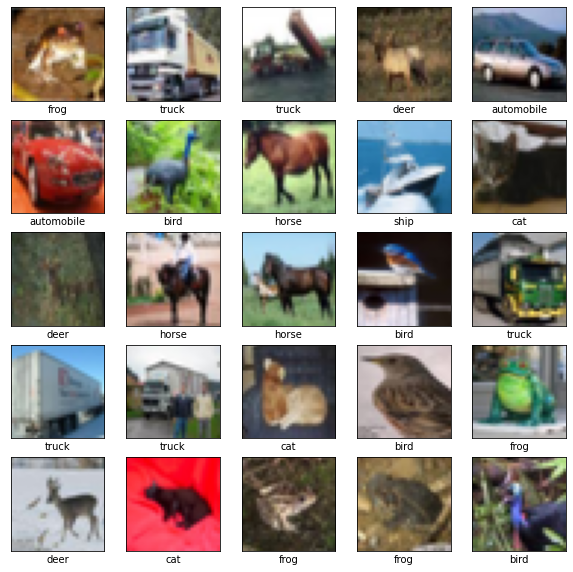

In [ ]:
# Visualizando clases del dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### **Creación del Modelo de Convolución**

Las 6 líneas de código a continuación definen la base convolucional utilizando un patrón común: una pila de capas Conv2D y MaxPooling2D.

Como entrada, una CNN toma tensores de forma (altura_imagen, ancho_imagen, canales_color), ignorando el tamaño del lote. Para este ejercicio la CNN se configurará para procesar entradas de forma (32, 32, 3), que es el formato de las imágenes CIFAR, esto se puede hacer pasando el argumento input_shape a la primera capa.

In [ ]:
# Creando el modelo de CNN y definiendo el tensor de caracteristicas
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='linear', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='linear'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='linear'))

In [ ]:
# Visualizando parametros del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

#### **Creación de las capas**

A continuación se van a crear las capas requeridas que son una de 128, otra de 64 y la última que corresponde a la salida de 10 categorías. 

Para las dos primeras capas se va a utilizar la función de activación "relu" mientras que para la última se va a utilizar "softmax" ya que en cuya salida se obtienen las probabilidades de las distintas clases y esto es lo que se indica en la tarea: **Una capa lineal de salida que obtenga la probabilidad de cada clase.**

In [ ]:
# Pasando imagenes de 2D a 1D y agregando parametros requeridos en la tarea
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) # agregando parametros especificos requeridos en la tarea
model.add(layers.Dense(64, activation='relu')) # agregando parametros especificos requeridos en la tarea
model.add(layers.Dense(10, activation = 'softmax')) # se agrega una capa final de 10, dado a que son 10 clases las que se quieren predecir. 

In [ ]:
# Visualizando modelo final
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#### **Compilación y entrenamiento del modelo final**
A continuación se va a proceder a hacer el entrenamiento del modelo, para ello tal y como se indica en la tarea se va a utilizar el optimizador "Stochastic Gradient Descent" -> "SGD" y en cuanto al tamaño del lote se va a optar por entrenarlo durante 100 iteraciones o epochs.

In [ ]:
# Compilando y entrenando el modelo
model.compile(optimizer = 'SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 8s 5ms/step - loss: 1.8982 - accuracy: 0.3167 - val_loss: 1.7697 - val_accuracy: 0.3649
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5424 - accuracy: 0.4483 - val_loss: 1.4477 - val_accuracy: 0.4825
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3654 - accuracy: 0.5141 - val_loss: 1.3164 - val_accuracy: 0.5208
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2452 - accuracy: 0.5589 - val_loss: 1.2770 - val_accuracy: 0.5429
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1531 - accuracy: 0.5954 - val_loss: 1.2272 - val_accuracy: 0.5550
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0802 - accuracy: 0.6191 - val_loss: 1.1104 - val_accuracy: 0.6053
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0189 - accuracy: 0.6429 - val_loss: 1.1150 - val_accuracy: 0.61

#### **Gráfico de las curvas de loss para datos de entrenamiento y validación**

Al ser 100 etapas de entrenamiento, solo se va a optar por mostrar métricas generales del modelo en cuanto al entrenamiento y la validación final.

In [ ]:
# Funcion para graficar el loss y el accuracy del modelo
def plot_loss_accuracy(plt, history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()
  plt.close()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.show()
  plt.close()

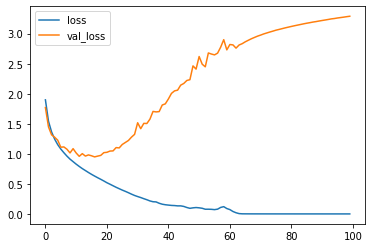

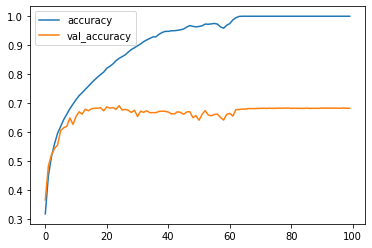

In [ ]:
# Evaluando el modelo
plot_loss_accuracy(plt, history)

In [ ]:
# Imprimiendo el resultado global
print(test_acc)

0.6743000149726868


#### **Análisis:**

Se puede observar rápidamente como el accuracy global asciende al 67.43%, esto indica que nuestro modelo es capaz de detectar en mayor o menor medida las imágenes que se le ingestan y es capaz de clasificarlas, sin embargo presenta problemas con algunas de las imágenes ya que tiende a confundir categorías o asignar etiquetas equivocadas.

A nivel general un modelo con un accuracy de un 67.43% no es un modelo decente, pero vamos a compararlo con los resultados obtenidos usando pytorch. 

Por otro lado, observamos que las **funciones de pérdida (loss)** de los datasets de entrenamiento y prueba divergen casi desde las primeras iteraciones, indicando que **se está produciendo overfitting y el modelo no generaliza bien**. Ocurre lo mismo con la métrica (accuracy), ya que se puede ver que el accuracy conforme se fue entrenando la red convolucional iba subiendo hasta que se estabilizó en poco más de 80, mientras que la validación se mantuvo constante al llegar a 60 y de ahí fue disminuyendo/subiendo con cada iteración. 

#### **Creación del segundo modelo con Pytorch**

In [ ]:
# Importando las bibliotecas
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Transformando y normalizando el dataset de imagenes 
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

### **Lectura de los datos desde PyTorch**

In [ ]:
# Creando split de los datos
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


####**Verificando los datos**

In [ ]:
# Definiendo clases a predecir (deben ser 10 en total)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# Visualiando resultados
import matplotlib.pyplot as plt
import numpy as np

# Creando funcion para visualizar las imagenes
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizando
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
# Extrayendo imagenes de forma aleatoria
dataiter = iter(trainloader)
images, labels = dataiter.next()

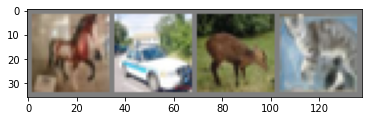

horse car   deer  cat  


In [ ]:
# Mostrando imagenes
imshow(torchvision.utils.make_grid(images))

# Imprimiendo etiquetas
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#### **Comprobando resultado de las imágenes extraídas:** 

Podemos observar como las imágenes extraídas son correctas y concuerdan tanto con la etiqueta así como la imagen en cuestión y que las etiquetas, se encuentran efectivamente en nuestro vector de características.

#### **Creación del Modelo de Convolución y las capas**

A continuación se van a crear las capas requeridas que son una de 128 junto con el multiplicador para obtener los shapes correctos, otra de 128, una más de 64 y la última que corresponde a la salida de 10 categorías. 

Para la primera con el shape y 128 se va a utilizar una función linear normal, con las dos restantes se va a utilizar la función de activación "relu" mientras que para la última se va a utilizar "softmax" ya que en cuya salida se obtienen las probabilidades de las distintas clases y esto es lo que se indica en la tarea: **Una capa lineal de salida que obtenga la probabilidad de cada clase.**


In [ ]:
# Importando las bibliotecas necesarias
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 128) # Definiendo el primer nodo con 128 con funcion de activacion lineal y multiplicando los shapes
        self.fc2 = nn.Linear(128, 64) # Definiendo los parametros de 128 nodos y 64 nodos con funcion de activacion lineal
        self.fc3 = nn.Linear(64, 10) # Creando la salida del modelo con 10 categorias o etiquetas a predecir
        self.logsoftmax = nn.LogSoftmax(dim=1) # Utilizando Softmax para predecir dado a que son varias categorias

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = torch.flatten(x, 1) # Pasando imagenes a una sola dimension 1D
        x = self.fc1(x) # Dejando primera con funcion linear
        x = F.relu(self.fc2(x)) # Agregando funcion de activacion relu
        x = F.relu(self.fc3(x)) # Agregando funcion de activacion relu
        x = self.logsoftmax(x) # Ultima capa con Softmax
        return x

net = Net()

#### **Compilación y entrenamiento del modelo final**
A continuación se va a proceder a hacer el entrenamiento del modelo, para ello tal y como se indica en la tarea se va a utilizar el optimizador "Stochastic Gradient Descent" -> "SGD" y en cuanto al tamaño del lote se va a optar por entrenarlo durante 100 iteraciones/epochs.

In [ ]:
# Importando bibliotecas
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(100):  # Creando 100 etapas de entrenamiento

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # llevando a cero los parametros del gradiente
        optimizer.zero_grad()

        # adelante + atrás + optimizar
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Extrayendo estadisticas
        running_loss += loss.item()
        if i % 12000 == 11999:    # Imprimiendo por cada 4000 mini-batches. 
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 12000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1, 12000] loss: 1.680
[2, 12000] loss: 1.324
[3, 12000] loss: 1.233
[4, 12000] loss: 1.177
[5, 12000] loss: 1.152
[6, 12000] loss: 1.123
[7, 12000] loss: 1.109
[8, 12000] loss: 1.096
[9, 12000] loss: 1.087
[10, 12000] loss: 1.078
[11, 12000] loss: 1.073
[12, 12000] loss: 1.069
[13, 12000] loss: 1.071
[14, 12000] loss: 1.065
[15, 12000] loss: 1.061
[16, 12000] loss: 1.054
[17, 12000] loss: 1.058
[18, 12000] loss: 1.054
[19, 12000] loss: 1.052
[20, 12000] loss: 1.050
[21, 12000] loss: 1.050
[22, 12000] loss: 1.046
[23, 12000] loss: 1.051
[24, 12000] loss: 1.048
[25, 12000] loss: 1.046
[26, 12000] loss: 1.040
[27, 12000] loss: 1.036
[28, 12000] loss: 1.042
[29, 12000] loss: 1.050
[30, 12000] loss: 1.034
[31, 12000] loss: 1.051
[32, 12000] loss: 1.043
[33, 12000] loss: 1.042
[34, 12000] loss: 1.044
[35, 12000] loss: 1.050
[36, 12000] loss: 1.043
[37, 12000] loss: 1.046
[38, 12000] loss: 1.038
[39, 12000] loss: 1.043
[40, 12000] loss: 1.041
[41, 12000] loss: 1.038
[42, 12000] loss: 1.036
[

In [ ]:
# Guardando nuestro modelo para hacer comprobacion
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#### **Validando la CNN con los datos de testing**

En este apartado se va a proceder a testear los resultados obtenidos.

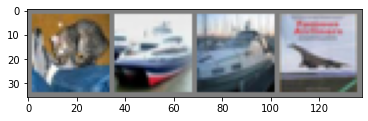

Resultados:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# Imprimiendo imagenes
imshow(torchvision.utils.make_grid(images))
print('Resultados: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Se puede observar como los resultados concuerdan con las imágenes extraídas, ya que la primera corresponde a a un gato, la segunda y tercera a un bote y la última a un avión.

In [ ]:
# Guardando modelo
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
# Creando output general
outputs = net(images)

In [ ]:
# Creando prediccion 
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  frog  car   car   plane


In [ ]:
# Viendo resultados generales con todo el dataset
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculando las salidas ingestando las imagenes en toda la CNN
        outputs = net(images)
    
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy del modelo sobre el dataset de prueba de 10000 imagenes: {100 * correct // total}%')

Accuracy del modelo sobre el dataset de prueba de 10000 imagenes: 56%


In [ ]:
# Viendo resultados especificos por clase
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # Recolectando la prediccion correcta por cada clase
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# Imprimiendo prediccion para cada clase
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy por clase: {classname:5s} es {accuracy:.1f}%')

Accuracy por clase: plane es 41.5%
Accuracy por clase: car   es 73.1%
Accuracy por clase: bird  es 40.1%
Accuracy por clase: cat   es 39.9%
Accuracy por clase: deer  es 48.4%
Accuracy por clase: dog   es 59.2%
Accuracy por clase: frog  es 61.7%
Accuracy por clase: horse es 63.6%
Accuracy por clase: ship  es 65.9%
Accuracy por clase: truck es 76.5%


#### **Análisis:**

Se puede observar que el accuracy global del modelo es de un 56%, es decir, mucho menor al que se obtiene con la biblioteca de TensorFlow. 

A nivel general un modelo que tenga un 56% de accuracy tampoco se puede considerar como un buen modelo, sin embargo si vemos el accuracy por categorías podemos observar que la clase que predice mejor es cuando tenemos la imagen de una camión (truck) y la que peores resultados genera es cuando tenemos un gato, ya que solo tenemos un 39.9% de accuracy. 


#### **Conclusiones:**

Con la utilización de las dos bibliotecas se pudo demostrar que la que arroja los mejores resultados en ambos ejercicios es la de TensorFlow con un 49% (en el primer modelo) y un 67.43% (en sel segundo modelo con CNN) mientras que con la de Pytorch tenemos un 42% (primer modelo) y un 56% (segundo modelo con CNN). 

Por otro lado, a nivel computacional, la red convolucional creada con TensorFlow es la que se ejecuta de forma más rápida, ya que esta tardo cerca de 21 minutos, mientras que la creada con Pytorch tardó casi una hora y 56 minutos. Es importante aclarar que se utilizaron 100 iteraciones o epochs en ambos casos y se utilizaron la totalidad de las imágenes para entrenar y para testear, por otro lado se añadieron parámetros extras para probar los diferentes algoritmos en el segundo ejercicio, aunque los resultados con los modelos más básicos fueron similares y en el modelo con Tensorflow tardó menos que con el de PyTorch.